In [1]:
%matplotlib notebook


from neuron import h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
import os

from cell_inference.cells.stylizedcell import CellTypes
from cell_inference.config import paths, params


cell_type = CellTypes.ACTIVE

h.nrn_load_dll(paths.COMPILED_LIBRARY)
geo_standard = pd.read_csv(paths.GEO_STANDARD,index_col='id')
h.tstop = params.TSTOP
h.dt = params.DT

In [2]:
from cell_inference.utils.plotting.plot_results import plot_lfp_traces, plot_lfp_heatmap
from cell_inference.utils.feature_extractors.SummaryStats2D import calculate_stats, build_lfp_grid
from cell_inference.cells.activecell import ActiveCell
from cell_inference.cells.passivecell import PassiveCell
from cell_inference.cells.simulation import Simulation
from cell_inference.utils.currents.recorder import Recorder
from cell_inference.utils.feature_extractors.parameterprediction import ClassifierTypes, ClassifierBuilder

In [3]:
import json

CONFIG_PATH = os.path.join('cell_inference/resources/simulation_data/500s_trial/config.json')

with open(CONFIG_PATH, 'r') as f:
    config = json.load(f)

inference_list = config['Trial_Parameters']['inference_list']
ranges = config['Simulation_Parameters']['loc_param_range']
ranges.update(config['Simulation_Parameters']['geo_param_range'])
ranges['y'] = [-100, 100]
feature_range = (-1, 1)

print(inference_list)

DATA_PATH = 'cell_inference/resources/simulation_data'
TRIAL_PATH = os.path.join(DATA_PATH, '500s_trial')

LFP_PATH = os.path.join(TRIAL_PATH, 'lfp.npz')  # LFP and labels

lfp    = np.load(LFP_PATH)['x']
params = np.load(LFP_PATH)['y']
gmax   = np.load(LFP_PATH)['gmax']
t      = np.load(LFP_PATH)['t']

print(params.shape)

['y', 'd', 'theta', 'h', 'phi', 'r_s', 'l_t', 'r_t']
(500, 8)


In [4]:
import pandas as pd

df = pd.DataFrame(params, columns=inference_list)

<IPython.core.display.Javascript object>


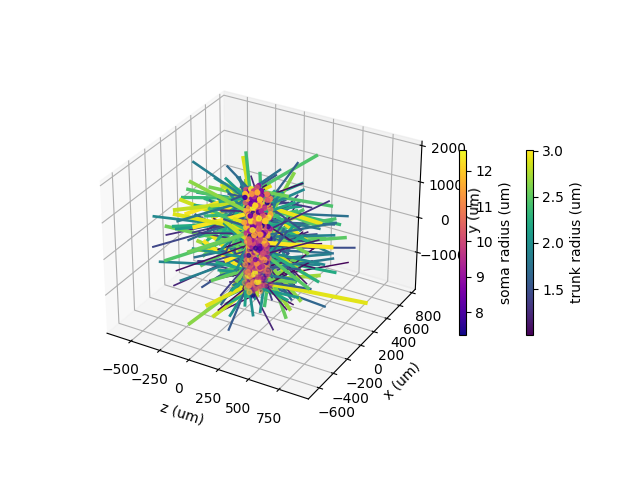

(<Figure size 640x480 with 3 Axes>,
 <Axes3DSubplot:xlabel='z (um)', ylabel='x (um)'>)

In [5]:
from cell_inference.utils.plotting.plot_all_cells import plot_all_cells

plot_all_cells(df)

<IPython.core.display.Javascript object>


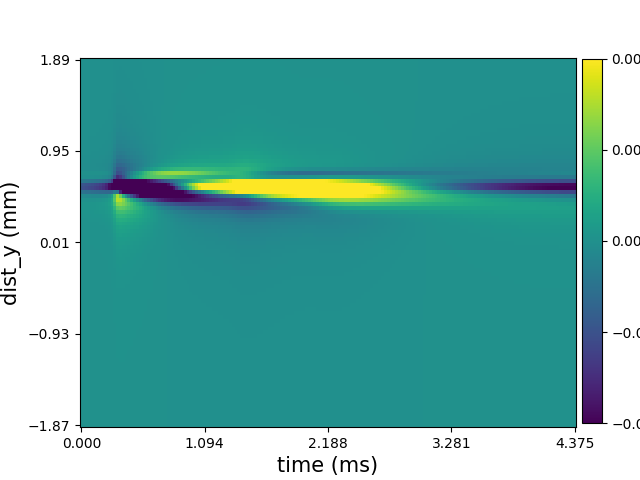

<IPython.core.display.Javascript object>


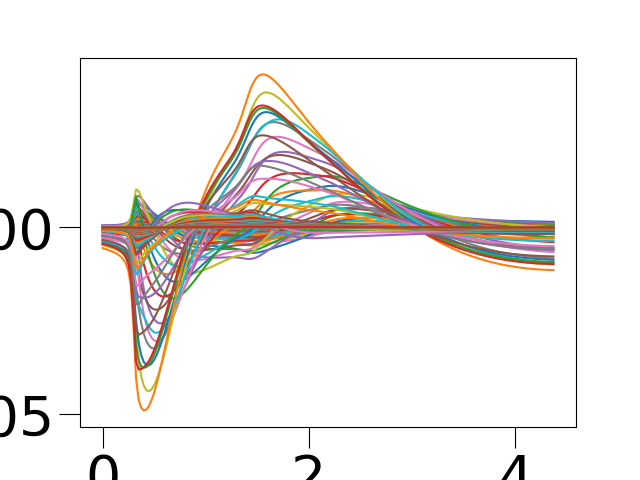

In [6]:
from cell_inference.config import params
from cell_inference.utils.plotting.plot_results import plot_lfp_heatmap, plot_lfp_traces

cell_idx = 0

ix = 1
ylim = [-1900,1900]
x_dist = np.unique(params.ELECTRODE_POSITION[:,0])
e_idx = ((params.ELECTRODE_POSITION[:,0]==x_dist[ix]) & 
         (params.ELECTRODE_POSITION[:,1]>=ylim[0]) & 
         (params.ELECTRODE_POSITION[:,1]<=ylim[1]))

_ = plot_lfp_heatmap(t,params.ELECTRODE_POSITION[e_idx, 1],
                              lfp[cell_idx][:,e_idx], vlim='auto',
                              fontsize=15,labelpad=0,ticksize=10,nbins=5)

_ = plot_lfp_traces(t, lfp[cell_idx])